Explained variance by components: [0.64703577 0.33641501]


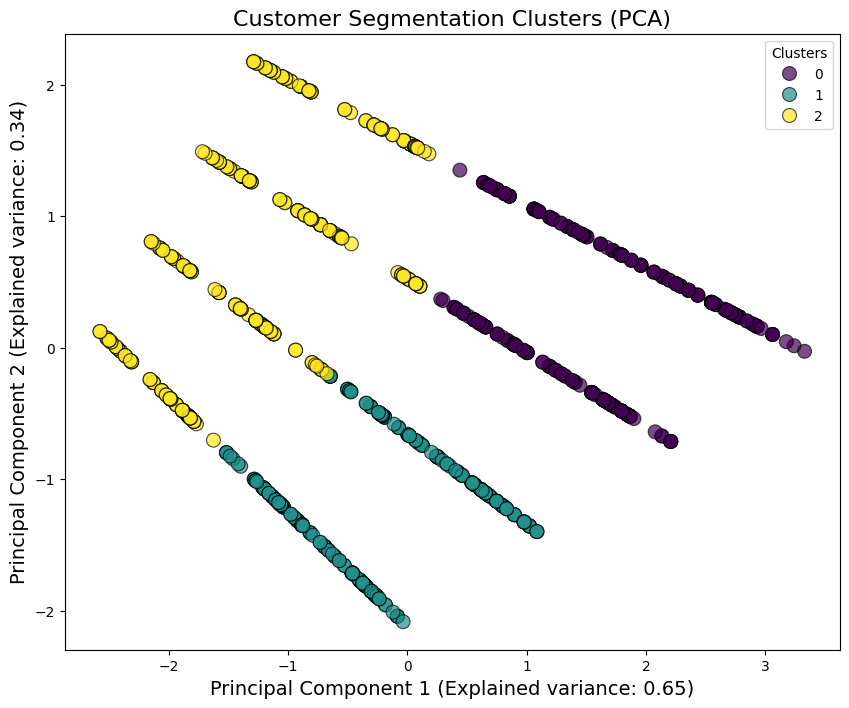

PCA Components (Feature loadings):
Principal Component 1:
  Quantity: 0.454
  TotalValue: 0.709
  Price: 0.540
Principal Component 2:
  Quantity: 0.764
  TotalValue: 0.002
  Price: -0.645
DB Index: 0.8171


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


customers_df = pd.read_csv('Customers.csv')  
transactions_df = pd.read_csv('Transactions.csv')  


merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')


numerical_features = ['Quantity', 'TotalValue', 'Price']  


scaler = StandardScaler()
features_scaled = scaler.fit_transform(merged_df[numerical_features])  


pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by components: {explained_variance}")

merged_df['PCA1'] = pca_result[:, 0]
merged_df['PCA2'] = pca_result[:, 1]

kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(features_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=merged_df, palette='viridis', s=100, alpha=0.7, edgecolor='black')

plt.title('Customer Segmentation Clusters (PCA)', fontsize=16)
plt.xlabel(f'Principal Component 1 (Explained variance: {explained_variance[0]:.2f})', fontsize=14)
plt.ylabel(f'Principal Component 2 (Explained variance: {explained_variance[1]:.2f})', fontsize=14)

plt.legend(title='Clusters', loc='upper right')
plt.show()

print("PCA Components (Feature loadings):")
for i, component in enumerate(pca.components_):
    print(f"Principal Component {i+1}:")
    for feature, value in zip(numerical_features, component):
        print(f"  {feature}: {value:.3f}")

from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(features_scaled, merged_df['Cluster'])
print(f"DB Index: {db_index:.4f}")
